<a href="https://colab.research.google.com/github/islaarema31/PCVK/blob/main/Jobsheet_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Praktikum

1.  Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3.  Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)


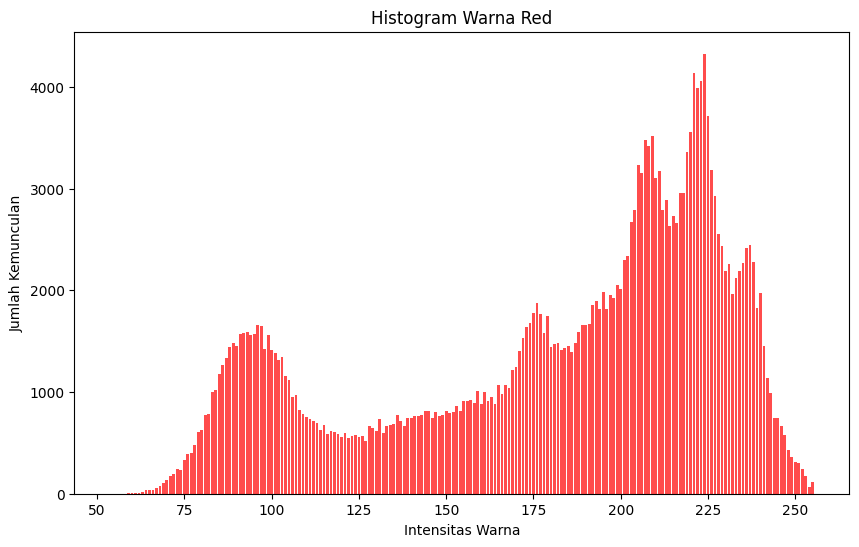

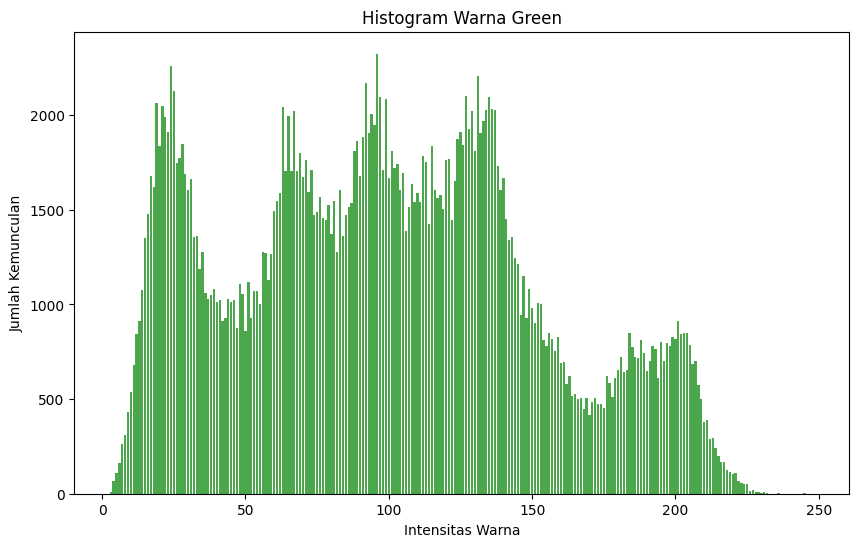

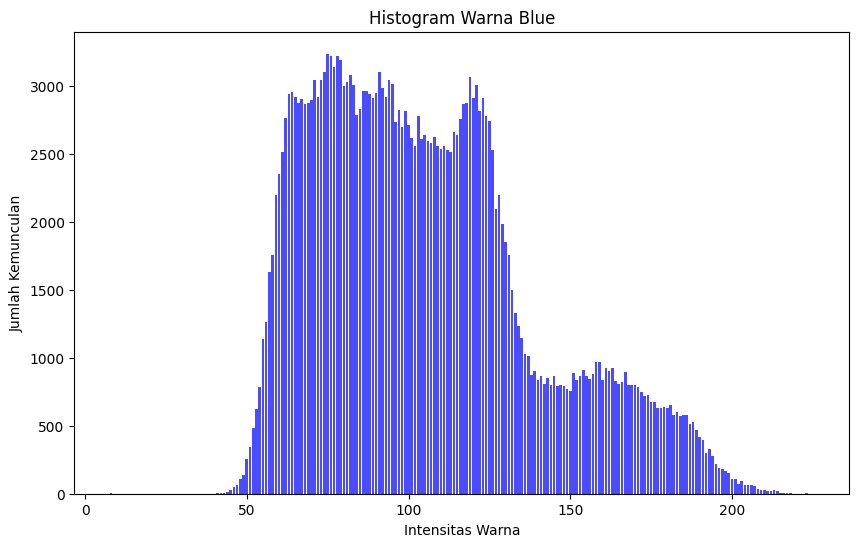

In [ ]:
img = cv.imread('/content/drive/MyDrive/Halokes/Lenna_(test_image).png')

def pixel(image):
  red = {}
  green = {}
  blue = {}

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      b = int(image[y, x, 0])
      g = int(image[y, x, 1])
      r = int(image[y, x, 2])

      if r in red:
        red[r] += 1
      else:
        red[r] = 1

      if g in green:
        green[g] += 1
      else:
        green[g] = 1

      if b in blue:
        blue[b] += 1
      else:
        blue[b] = 1

  return red, green, blue

def histogram(intensitas, warna):
  plt.figure(figsize=(10, 6))
  plt.bar(intensitas.keys(), intensitas.values(), color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

intensitas_merah, intensitas_hijau, intensitas_biru = pixel(img)
histogram(intensitas_merah, 'red')
histogram(intensitas_hijau, 'green')
histogram(intensitas_biru, 'blue')


4.  Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

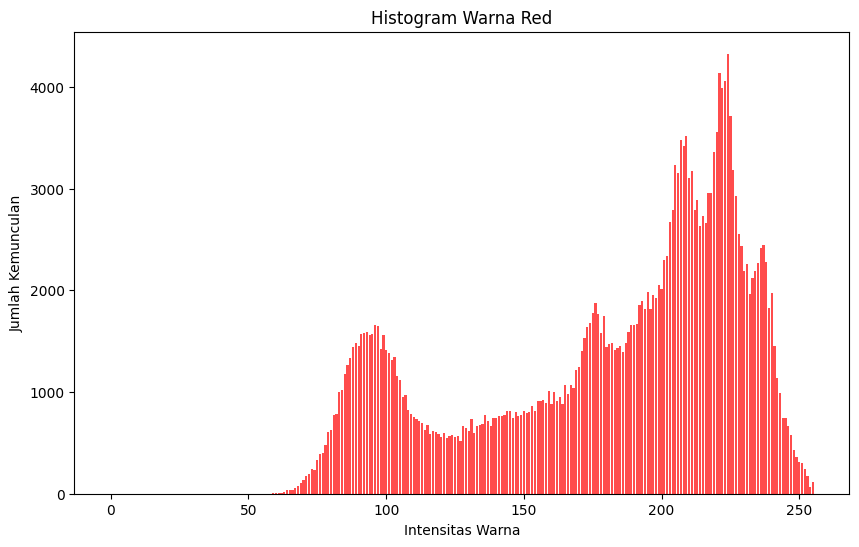

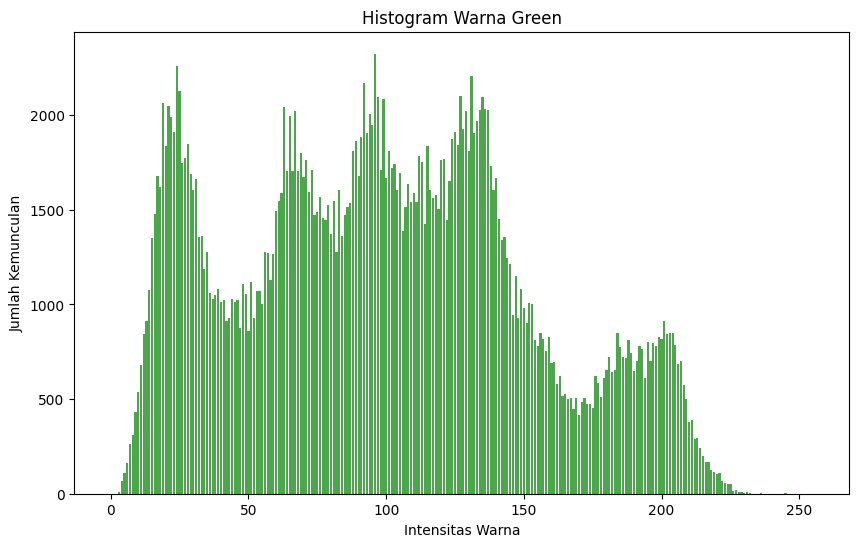

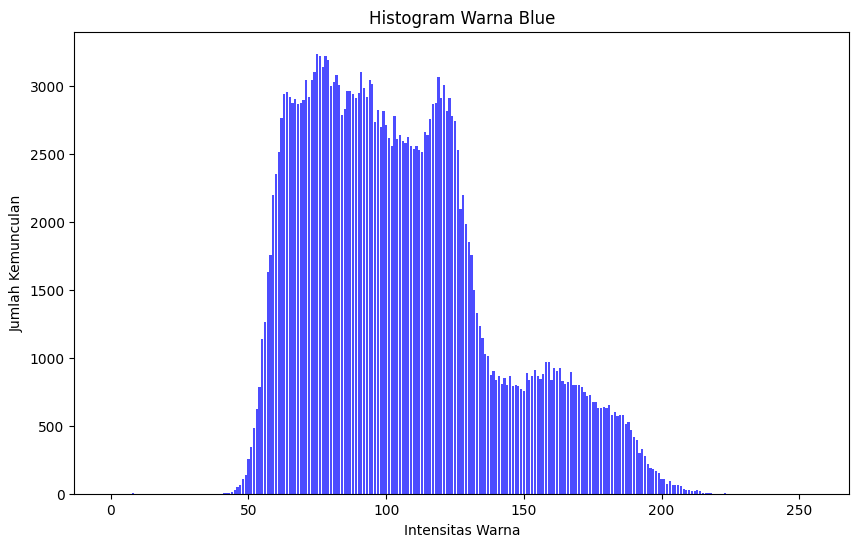

In [ ]:
def numpy_histogram(intensitas, warna):
  key = list(intensitas.keys())
  value = list(intensitas.values())

  histogram = np.histogram(key, bins=range(257), weights=value)[0]

  plt.figure(figsize=(10, 6))
  plt.bar(range(256), histogram, color=warna.lower(), alpha=0.7)
  plt.title(f'Histogram Warna {warna.capitalize()}')
  plt.xlabel('Intensitas Warna')
  plt.ylabel('Jumlah Kemunculan')
  plt.show()

numpy_histogram(intensitas_merah, 'red')
numpy_histogram(intensitas_hijau, 'green')
numpy_histogram(intensitas_biru, 'blue')


5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


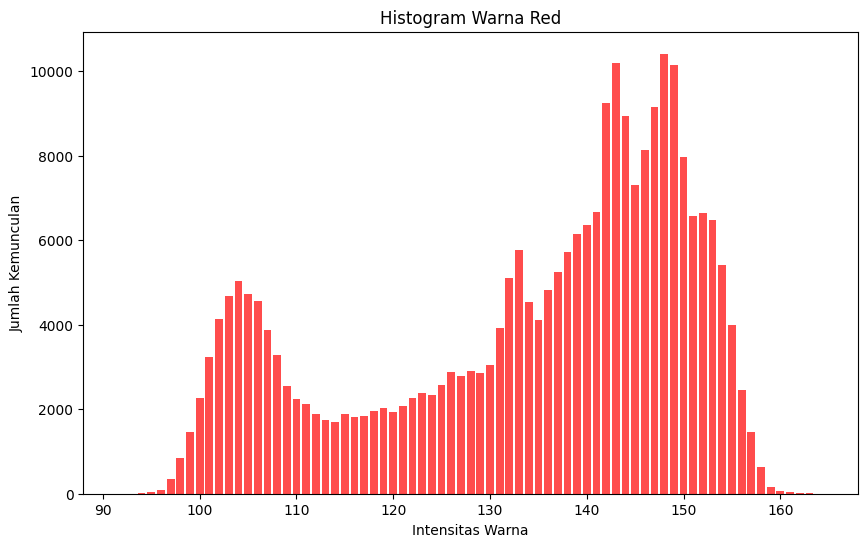

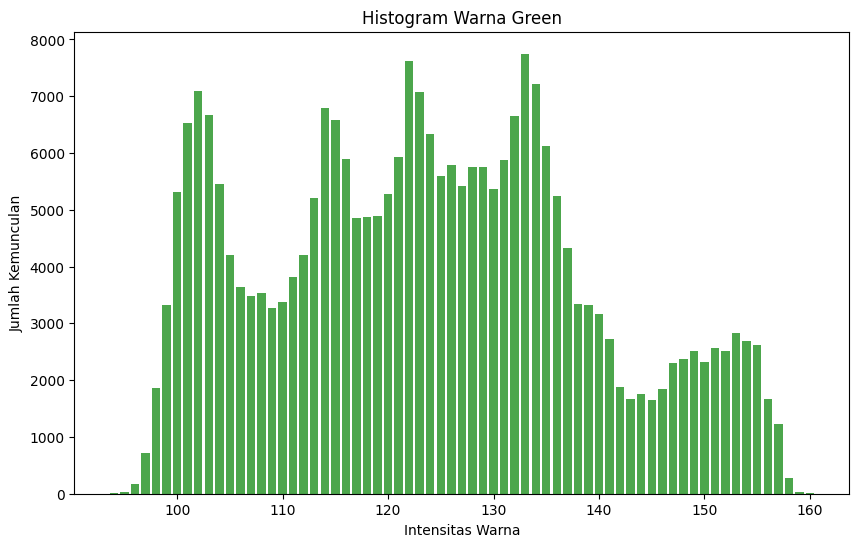

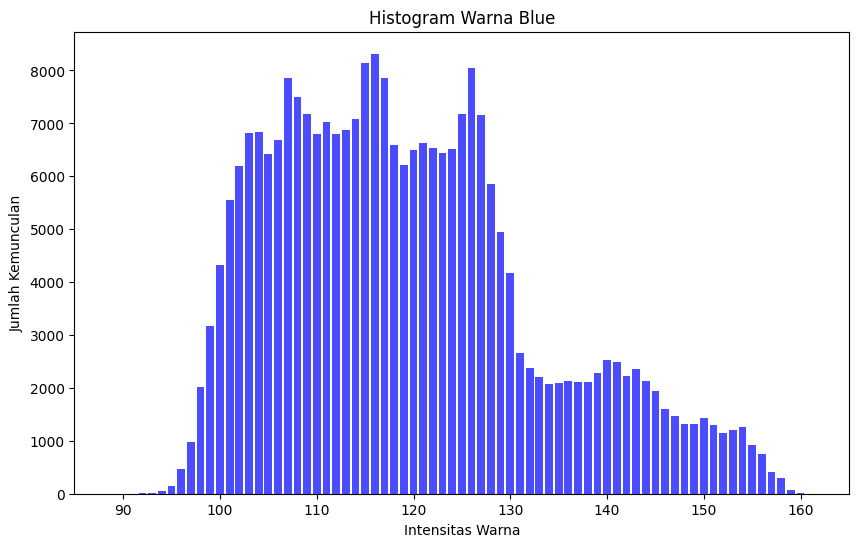

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/Halokes/lena_lc.jpg')

intensitas_merah, intensitas_hijau, intensitas_biru = pixel(img2)
histogram(intensitas_merah, 'red')
histogram(intensitas_hijau, 'green')
histogram(intensitas_biru, 'blue')

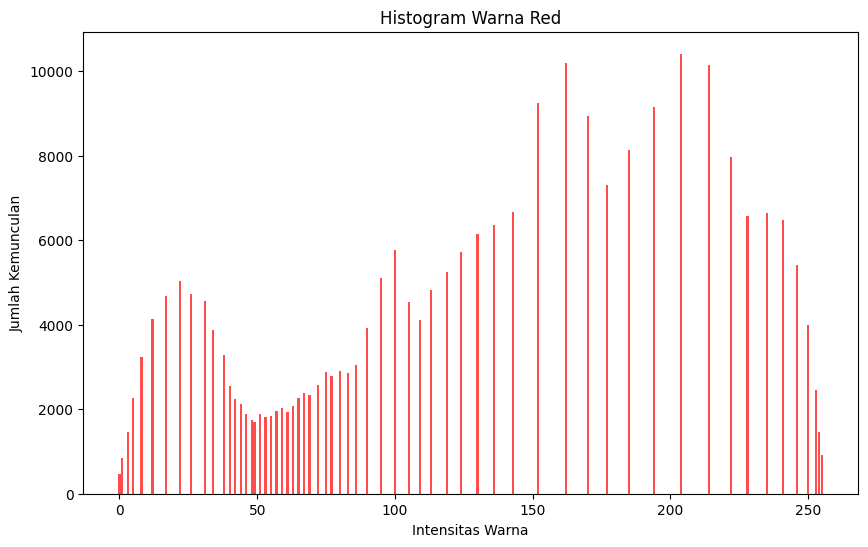

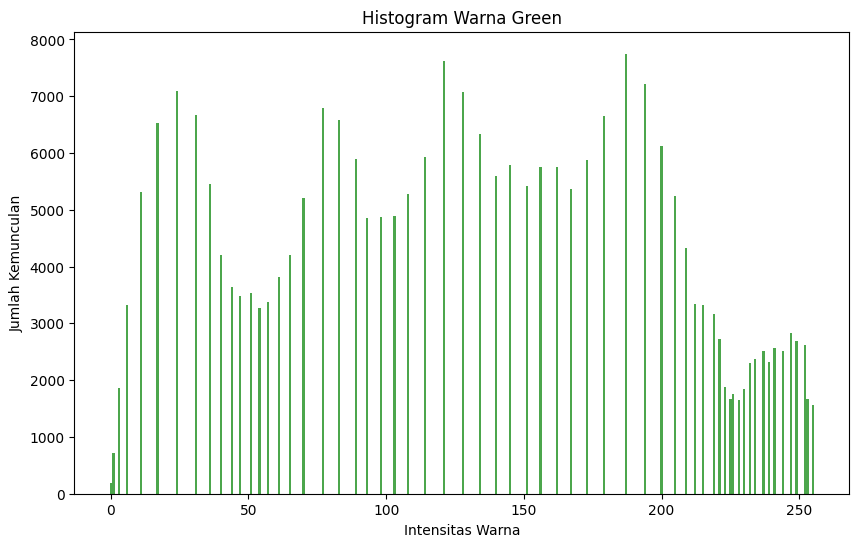

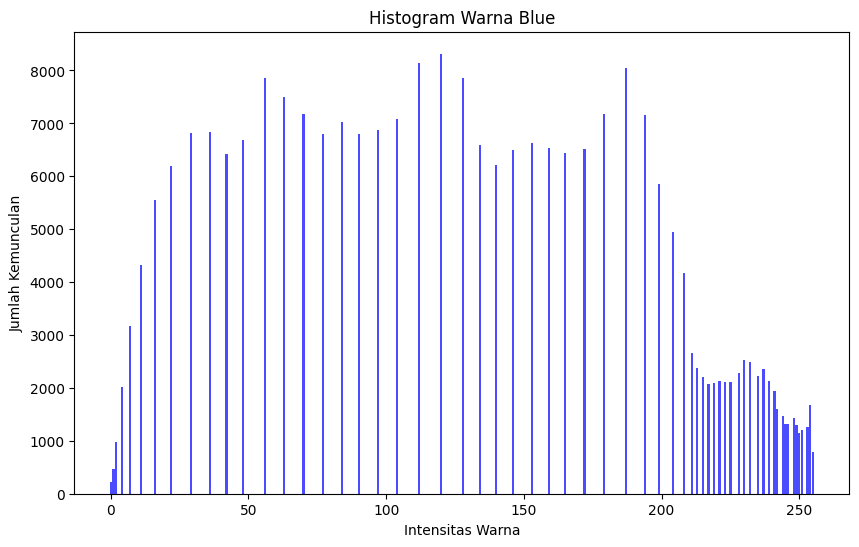

In [ ]:
def histogram_equalization(image):

  intensitas_merah, intensitas_hijau, intensitas_biru = pixel(image)

  red_channel = hitung_sk(image[...,2], intensitas_merah)
  green_channel = hitung_sk(image[...,1], intensitas_hijau)
  blue_channel = hitung_sk(image[...,0], intensitas_biru)

  merged_image = cv.merge([blue_channel, green_channel, red_channel])

  return merged_image

def hitung_sk(image, list_intensitas):
  list_intensitas = dict(sorted(list_intensitas.items()))

  l = 256
  rj = list(list_intensitas.keys())
  nrj = list(list_intensitas.values())

  k0 = []
  for i in range(len(rj)):
    if i == 0:
      k0.append(nrj[i])
    else:
        k0.append(nrj[i] + k0[i - 1])

  sk = []
  list_pixel_baru = {}
  for i in range(len(rj)):
    k0s = (l - 1) / k0[-1] * k0[i]
    sk.append(round(k0s))

    list_pixel_baru[rj[i]] = sk[i]

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      image[y, x] = list_pixel_baru[image[y, x]]

  return image

img3 = np.copy(img2)
equalized_img = histogram_equalization(img3)

intensitas_merah, intensitas_hijau, intensitas_biru = pixel(equalized_img)
histogram(intensitas_merah, 'red')
histogram(intensitas_hijau, 'green')
histogram(intensitas_biru, 'blue')

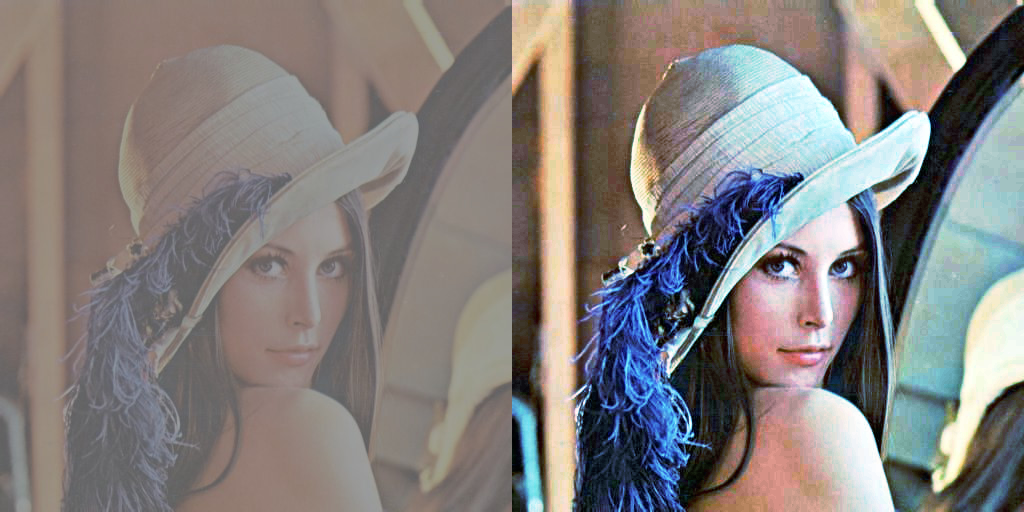

In [ ]:
final_frame = cv.hconcat((img2, equalized_img))
cv2_imshow(final_frame)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

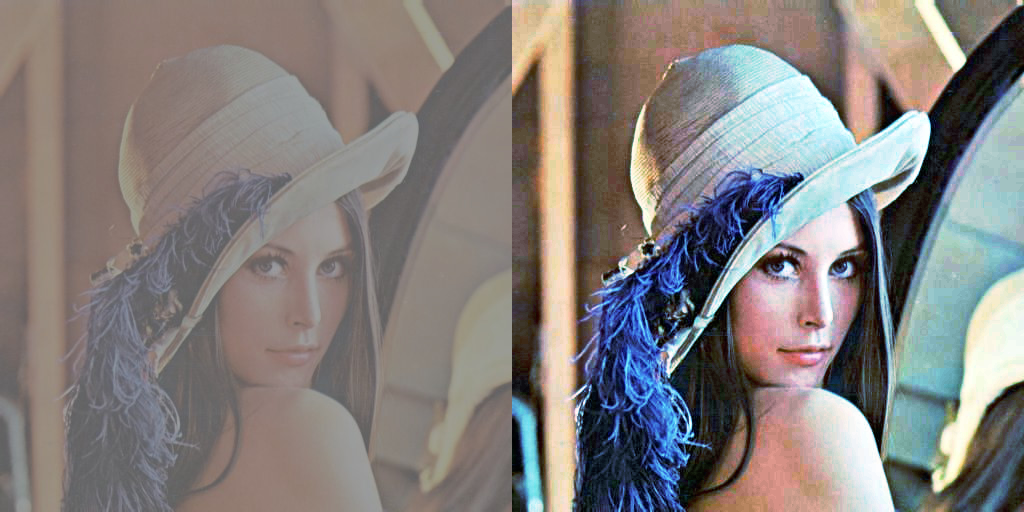

In [ ]:
def use_equlizeHist(image):
  b, g, r = cv.split(img)
  b_eq = cv.equalizeHist(b)
  g_eq = cv.equalizeHist(g)
  r_eq = cv.equalizeHist(r)

  img_eq = cv.merge((b_eq, g_eq, r_eq))

  return img_eq

equalized_img = use_equlizeHist(img2)
final_frame = cv.hconcat((img2, equalized_img))
cv2_imshow(final_frame)

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

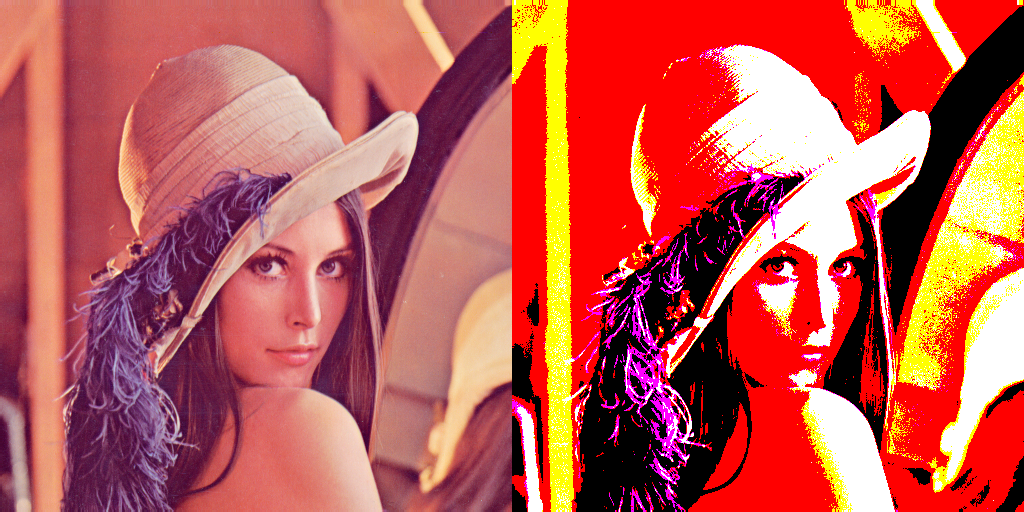

In [ ]:
img = cv.imread('/content/drive/MyDrive/Halokes/Lenna_(test_image).png')

colors = {
    'hitam': (0, 0, 0),
    'hijau': (0, 255, 0),
    'kuning': (255, 255, 0),
    'biru': (0, 0, 255),
    'cyan': (0, 255, 255),
    'magenta': (255, 0, 255),
    'putih': (255, 255, 255)
}

def cari_warna_terdekat(rgb_color):
    min_dist = float('inf')
    nearest_color = None
    for color, target_rgb in colors.items():
        dist = np.linalg.norm(np.array(rgb_color) - np.array(target_rgb))
        if dist < min_dist:
            min_dist = dist
            nearest_color = color
    return nearest_color

def ubah_warna(image):
  new_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        pixel_color = tuple(image[y, x])
        nearest_color = cari_warna_terdekat(pixel_color)
        new_image[y, x] = colors[nearest_color]

  return new_image

new_image = ubah_warna(img)

final_frame = cv.hconcat((img, new_image))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

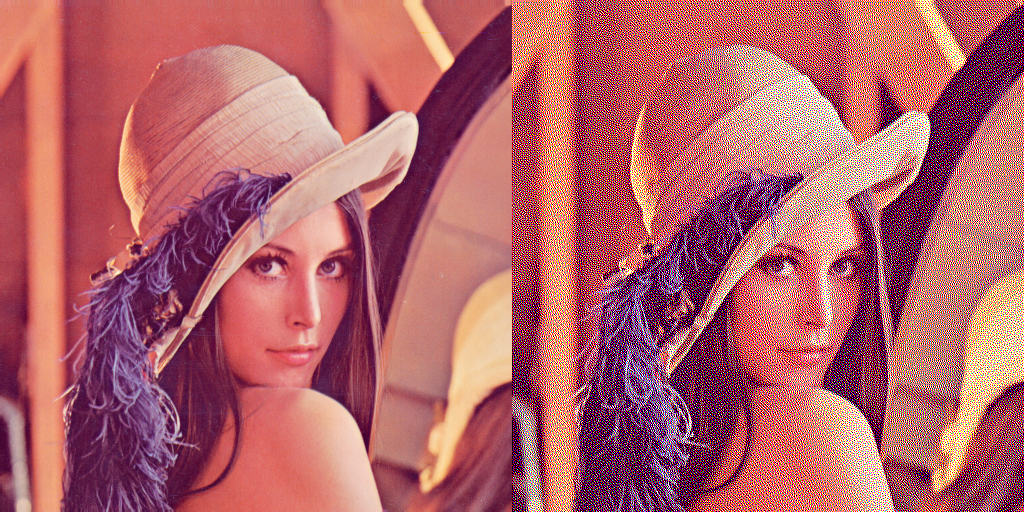

In [ ]:
img2 = cv.imread('/content/drive/MyDrive/Halokes/Lenna_(test_image).png')

def floyd_steinberg_dithering(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  channel = image.shape[2]
  jarak_pixel = 1

  for y in range(tinggi):
    for x in range(lebar):
      for c in range(channel):

        pixel_old = image[y, x, c]

        pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

        image[y, x, c] = pixel_new

        error = pixel_old - pixel_new

        if x + 1 < lebar:
          image[y, x + 1, c] = threshold(image[y, x + 1, c] + error * 7/16)
        if y + 1 < tinggi:
          if x - 1 >= 0:
            image[y + 1, x - 1, c] = threshold(image[y + 1, x - 1, c] + error * 3/16)
          image[y + 1, x, c] = threshold(image[y + 1, x, c] + error * 5/16)
          if x + 1 < lebar:
            image[y + 1, x + 1, c] = threshold(image[y + 1, x + 1, c] + error * 1/16)

  return image

def threshold(nilai_warna):
  if nilai_warna > 255:
    nilai_warna = 255
  elif nilai_warna < 0:
    nilai_warna = 0

  return nilai_warna

img3 = np.copy(img2)

dithering_image = floyd_steinberg_dithering(img3)
final_frame = cv.hconcat((img2, dithering_image))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


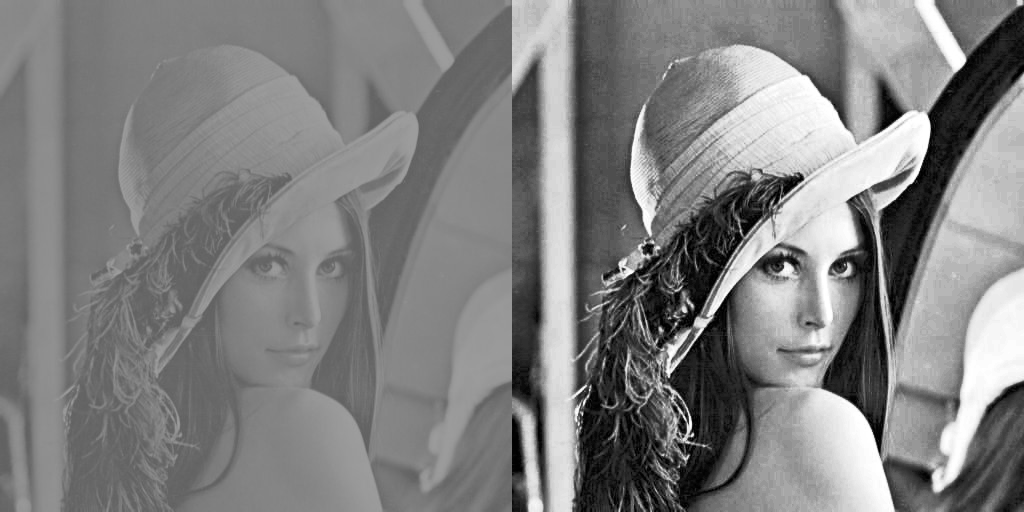

In [ ]:
img = cv.imread('/content/drive/MyDrive/Halokes/lena_lc.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_gray_1 = np.copy(img_gray)

equalized_img = cv.equalizeHist(img_gray_1)

final_frame = cv.hconcat((img_gray, equalized_img))
cv2_imshow(final_frame)

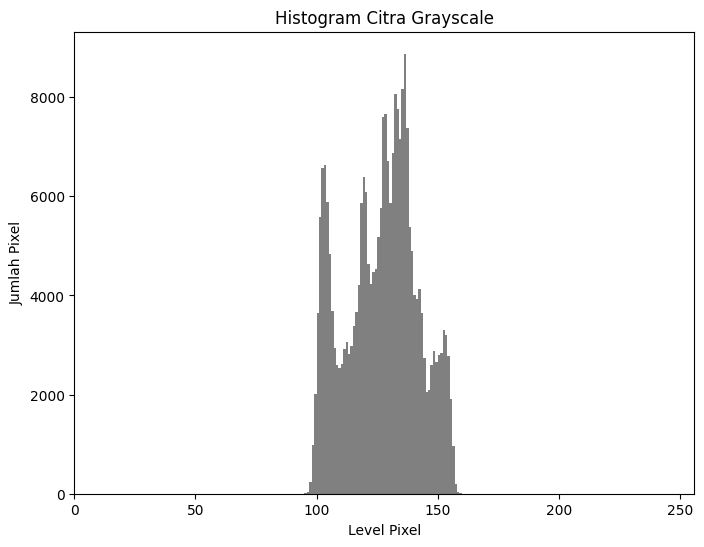

In [ ]:
def histogram_gray(image_path):

    image = image_path

    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    plt.figure(figsize=(8, 6))
    plt.title('Histogram Citra Grayscale')
    plt.xlabel('Level Pixel')
    plt.ylabel('Jumlah Pixel')
    plt.hist(image.flatten(), 256, [0, 256], color='gray')
    plt.xlim([0, 256])
    plt.show()

histogram_gray(img_gray)

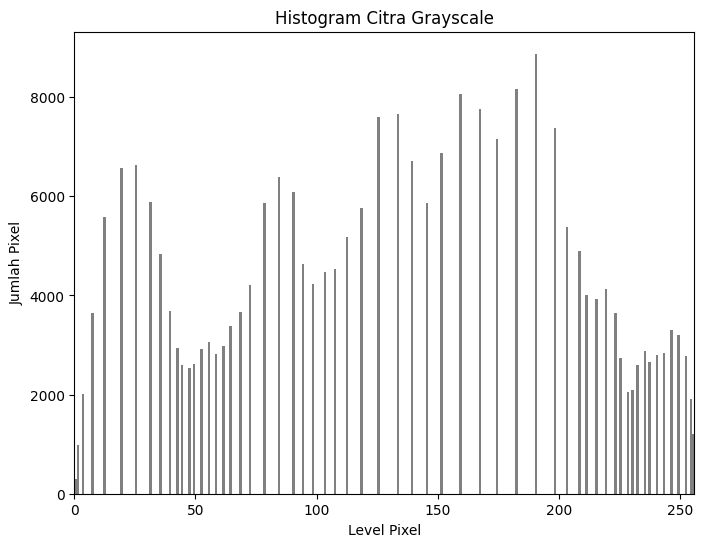

In [ ]:
histogram_gray(equalized_img)

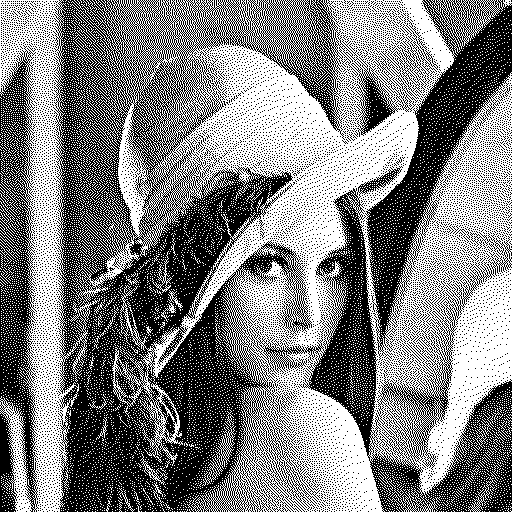

In [ ]:
def floyd_steinberg_dithering_gray(image):

  tinggi = image.shape[0]
  lebar = image.shape[1]
  jarak_pixel = 1

  for y in range(tinggi):
    for x in range(lebar):
      # Jarak pixel tetangga
      pixel_old = image[y, x]

      pixel_new = np.round((jarak_pixel * pixel_old) / 255.0) * (255 / jarak_pixel)

      image[y, x] = pixel_new

      error = pixel_old - pixel_new

      if x + 1 < lebar:
        image[y, x + 1] = threshold(image[y, x + 1] + error * 7/16)
      if y + 1 < tinggi:
        if x - 1 >= 0:
          image[y + 1, x - 1] = threshold(image[y + 1, x - 1] + error * 3/16)
        image[y + 1, x] = threshold(image[y + 1, x] + error * 5/16)
        if x + 1 < lebar:
          image[y + 1, x + 1] = threshold(image[y + 1, x + 1] + error * 1/16)

  return image

dithering_image = floyd_steinberg_dithering_gray(equalized_img)
cv2_imshow(dithering_image)